In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.copy()
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churn_data = churn_data.drop(['RowNumber'], axis=1)
display(churn_data)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
exited_combinations = churn_data['Exited'].value_counts(normalize=True)
display(exited_combinations)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

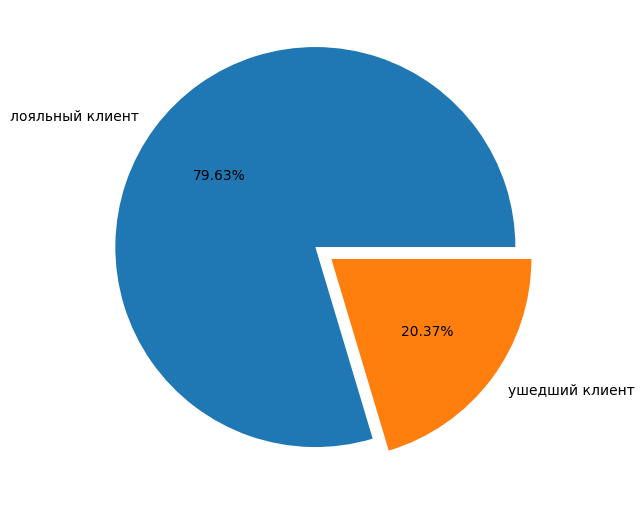

In [5]:
# Задание 9.1:
exited_combinations = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_combinations,
    labels=['лояльный клиент', 'ушедший клиент'],
    autopct='%.2f%%',
    explode = [0.1, 0]);

In [6]:
# Комментарии к заданию 9.1:
# 79.63% клиентов банка являются лояльными, а 20.37% клиентов банка - ушедшими.
# Вывод: Примерно четыре из пяти клиентов банка являются лояльными. Примерно каждый пятый клиент банка является или являлся ушедшим за определленный период времени. 

In [7]:
# Задание 9.2:
balance_more2500 = churn_data[churn_data['Balance'] > 2500]
display(balance_more2500)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


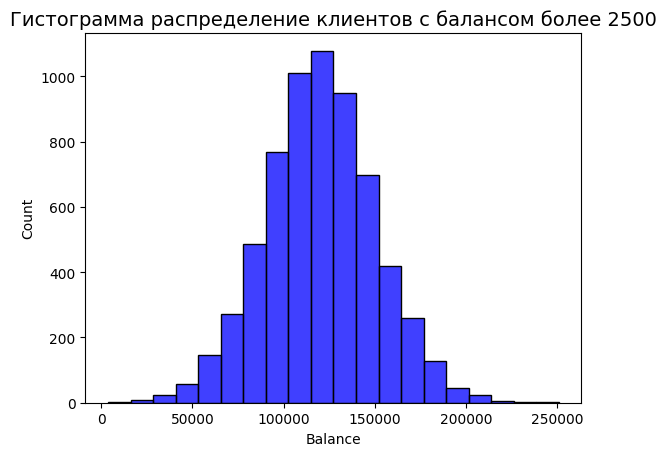

In [8]:
axes = sns.histplot(
    data=balance_more2500,
    x='Balance',
    bins=20,
    kde=False,
    color='blue'
);
axes.set_title('Гистограмма распределение клиентов с балансом более 2500', fontsize=14);

In [9]:
# Комментарии к заданию 9.2:
# Гистограмма показывает, что баланс лежат в пределах примерно от нуля до чуть более 250 000
# Вывод: Распределение имеет нормальный вид и мода распределения лежит в пределах примерно от 115 000 до 130 000 для примерно 110 клиентов.

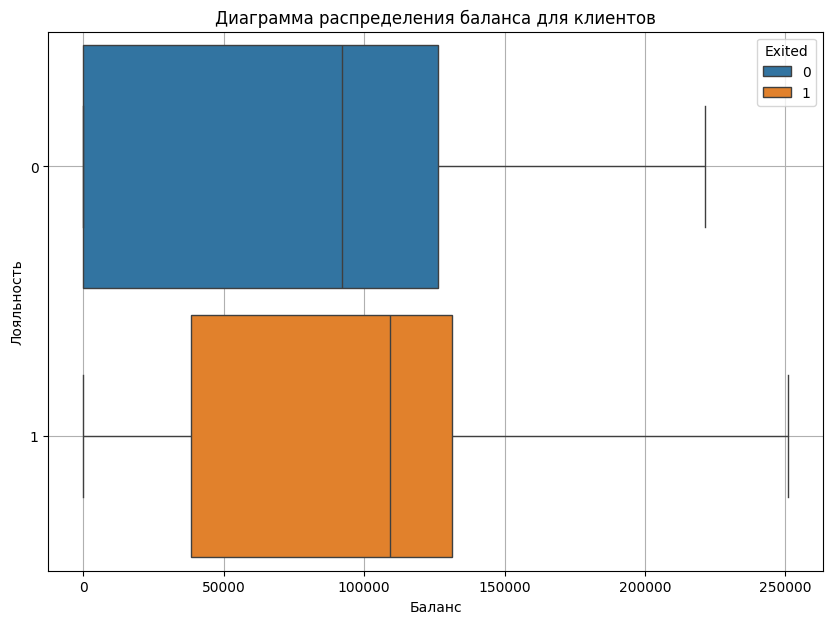

In [10]:
# Задание 9.3:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9,
    legend='full',
    hue="Exited"
)
boxplot.set_title('Диаграмма распределения баланса для клиентов');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

In [11]:
# Комментарии к заданию 9.3:
# Коробчатая диаграмма распределения баланса для лояльных и ушедших клиентов показывает, что верхний предел баланса у ушедших клиентов выше, чем у лояльных клиентов, также, как и медианное значение.
# Вывод: Ушедшие клиенты имеют в общем на счетах балас выше лояльныхю Предполагаю, что ушедших клиентов могли не удовлетворить невыгодные проценты по депозитам для держателей крупных сумм. Сделать выгодным специальное предложение для клиентов с балансом от 100 000 и выше.

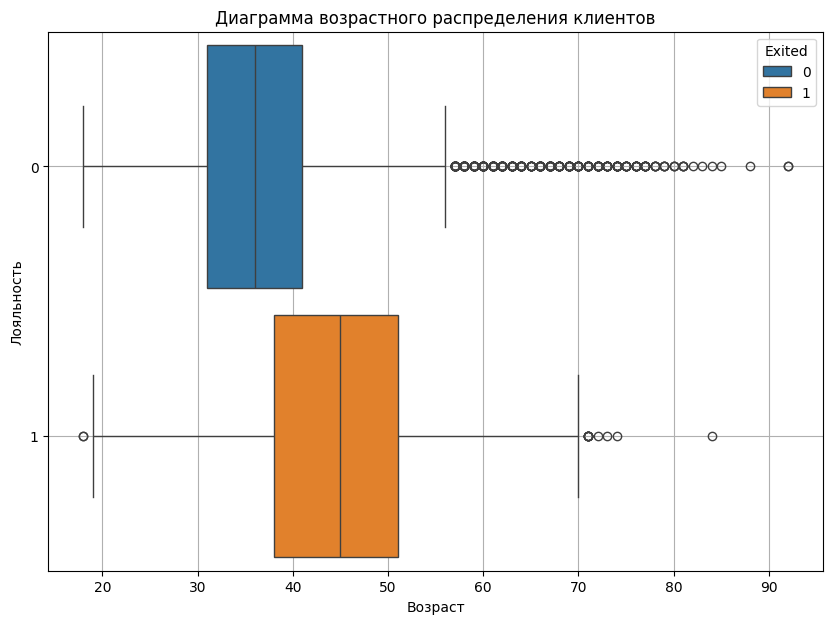

In [12]:
# Задание 9.4:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
    hue="Exited"
)
boxplot.set_title('Диаграмма возрастного распределения клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

In [13]:
# Комментарии к заданию 9.4
# Коробчатая диаграмма возростного распределения клиентов показывает,что медианный возраст лояльных клиентов ниже, чем у ушедших клиентов, также как и границы распределения. В возрастном распределении лояльных клиентов больше потенциальных выбросов.
# Вывод: Банку следует обратить внимание на среднюю возрастную группу, то есть на группу людей в возрасте от 37 до 52 лет. 

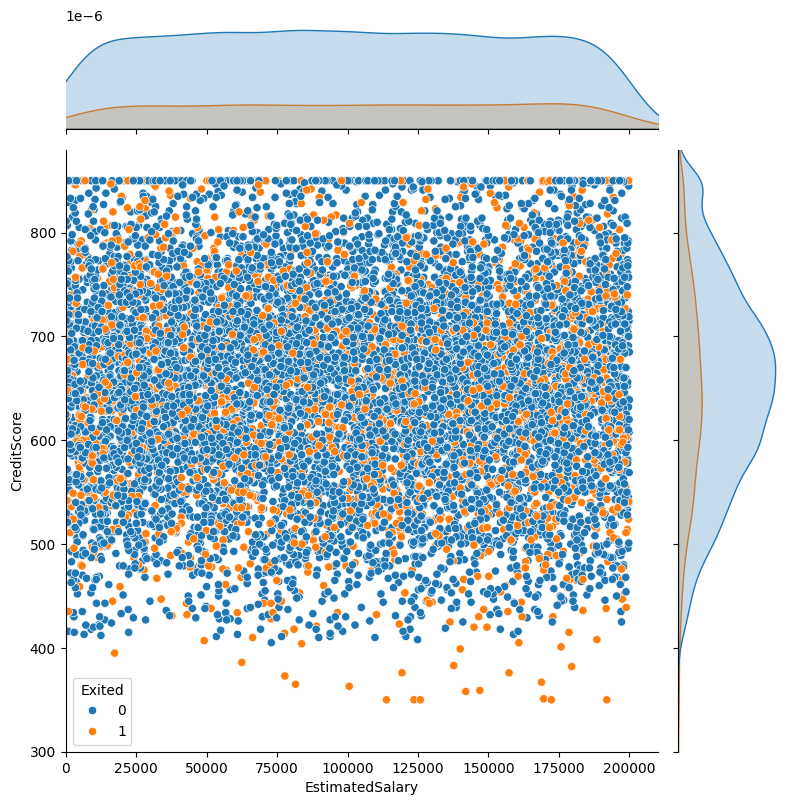

In [14]:
# Задание 9.5:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    xlim = (0, 210000),
    ylim = (300, 880),
    height=8
);

In [15]:
# Комментарии к заданию 9.5
# Точки на графике распределены равномерно, как для лояльных клиентов, так и для ушедших клиентов.
# Вывод: никакого вида зависимости не прослеживается.

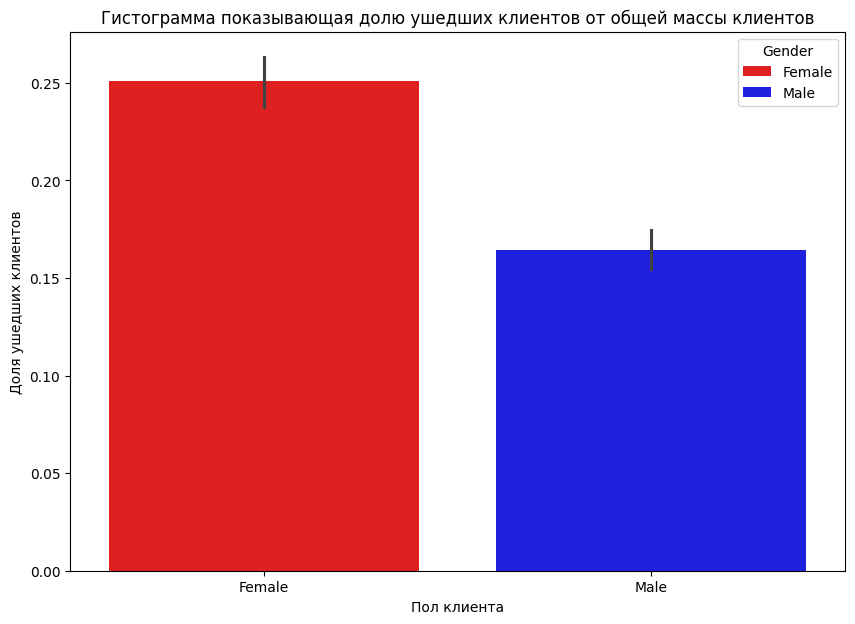

In [17]:
#Задание 9.6 :
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited',
    hue='Gender',
    legend='full',
    palette=['r','b']
    )
barplot.set_xlabel('Пол клиента')
barplot.set_ylabel('Доля ушедших клиентов')
barplot.set_title('Гистограмма показывающая долю ушедших клиентов от общей массы клиентов');

In [18]:
# Комментарии к заданию 9.6
# Из гистограммы видно, что доля ушедших клиентов женщин составляет примерно 0.25(или 25%), а доля ушедших клиентов мужчин от общего количества составлят примерно 0.16(или 16%).
# Вывод: Количество ушедших женщин выше, чем количество ушедших мужчин. Причем, как правило, уходит каждая четвертая женщина.

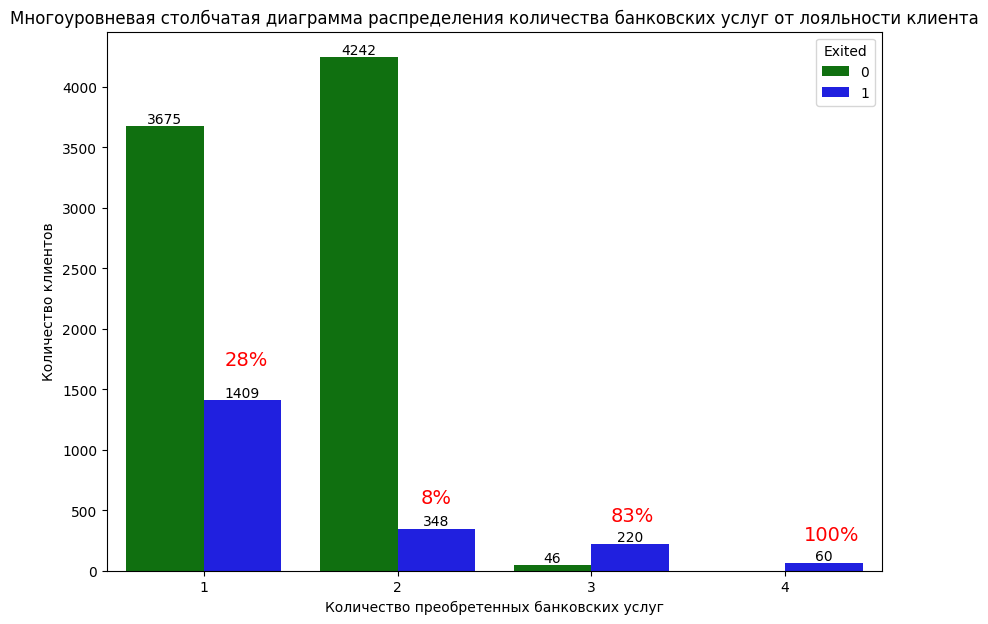

In [19]:
# Задание 9.7:
fig = plt.figure(figsize=(10, 7))
churn_data['Loyality'] = 1 - churn_data['Exited']# Добавим в таблицу признак лояльности зеркальный для признака "Exited"
churn_data['Total'] = churn_data['Loyality'] + churn_data['Exited']# Добавим столбец для удобства подсчетов при построении диаграммы
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Total',
    hue='Exited',
    legend='auto',
    palette=['g','b'],
    estimator='sum'
    )

barplot.bar_label(barplot.containers[0], fontsize=10)
barplot.bar_label(barplot.containers[1], fontsize=10)
barplot.set_xlabel('Количество преобретенных банковских услуг')
barplot.set_ylabel('Количество клиентов')
barplot.set_title('Многоуровневая столбчатая диаграмма распределения количества банковских услуг от лояльности клиента')
barplot.text(0.11, 1700, '28%', fontsize=14, color='r')
barplot.text(1.12, 560, '8%', fontsize=14, color='r')
barplot.text(2.1, 410, '83%', fontsize=14, color='r')
barplot.text(3.1, 250, '100%', fontsize=14, color='r');

In [20]:
# Комментарии к заданию 9.7
# Из столбчатой диаграммы видно, что процент тех клиентов, которые пользовались большим количеством услух в банке значительно выше среди ушедших клиентов.
# А среди тех, кто пользовался 4 банковскими услугами ушедших клиентов вообще 100%.
# Вывод: Рекомендую банку обратить вниманиие на клиентов с высоким количеством преобретенных услуг. Возможно стоит заинтересовать их новыми предложениями.

In [21]:
display(churn_data)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyality,Total
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


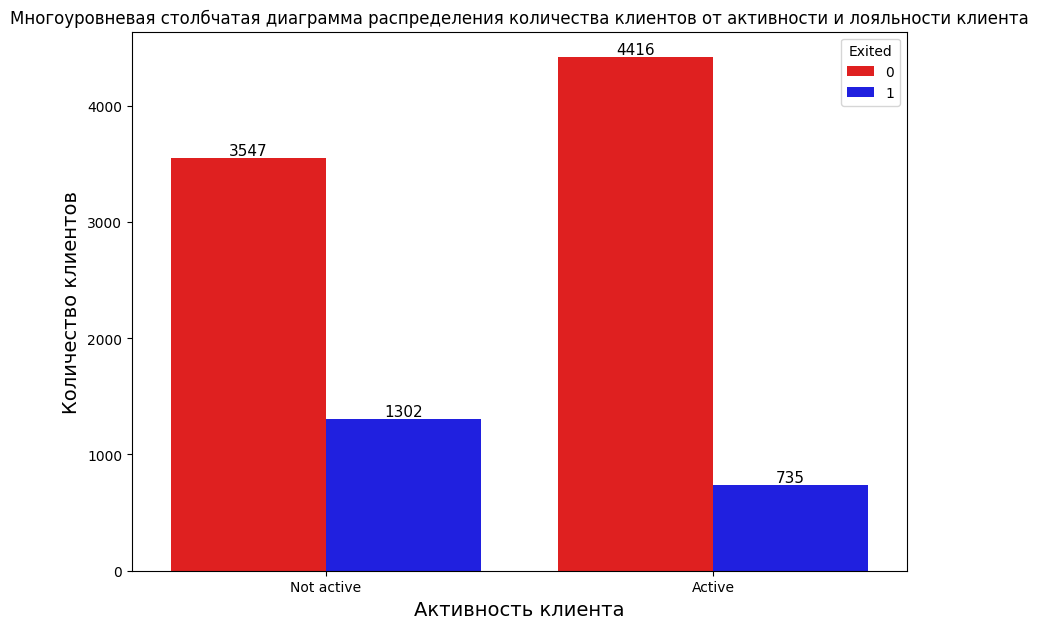

In [22]:
# Задание 9.8:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='Total',
    hue='Exited',
    legend='full',
    palette=['r','b'],
    estimator='sum'
    )

barplot.bar_label(barplot.containers[0], fontsize=11)
barplot.bar_label(barplot.containers[1], fontsize=11)
barplot.set_xlabel('Активность клиента', fontsize=14)
barplot.set_ylabel('Количество клиентов', fontsize=14)
barplot.set_title('Многоуровневая столбчатая диаграмма распределения количества клиентов от активности и лояльности клиента')
barplot.set_xticks([0,1], labels=['Not active', 'Active']);

In [23]:
# Комментарии к заданию 9.8
# Из столбчатой диаграммы выше можем легко посчитать: 
#    1. Процент ушедших клиентов от общего количества клиентов среди неактивных клиентов - 13.02% (или 26.85% от всех неактивных)
#    2. Процент ушедших клиентов от общего количества клиентов среди активных клиентов - 7.35% (или 14.27% от всех активных)
# Вывод:
# Поскольку процент ушедших клиентов от общего количества клиентов выше среди неактивных клиентов, то рекомендуется обратить внимание банка на
# неактивную часть клиентов дополнительными интересными предложениями или другими активностями)).  

In [119]:
# Задание 9.9 :
countries = churn_data.groupby(['Geography', 'Exited'])['Total'].sum().unstack()
countries_new = countries.copy()
countries_new['Country'] = countries.index
display(countries_new)

Exited,0,1,Country
Geography,,,
France,4204,810,France
Germany,1695,814,Germany
Spain,2064,413,Spain


In [120]:
display(churn_data['CustomerId'].nunique())#Количество уникальных значений для клиентов равна 10 000, что исключает повторы в значениях. 

10000

In [121]:
# Добавим дополнительный столбец в датай фрейм countries_new с доляй ушедших клиентов от общего количества клиентов по странам в процентах( И округлим до второго знака после запятой).
countries_new['exited_part'] = round((((countries_new[1])/(countries_new[0] + countries_new[1]))*100),2)
display(countries_new)

Exited,0,1,Country,exited_part
Geography,,,,
France,4204,810,France,16.15
Germany,1695,814,Germany,32.44
Spain,2064,413,Spain,16.67


In [124]:
# Построим тепловую картограмму
fig = px.choropleth(
    data_frame=countries_new, #DataFrame
    locations='Country', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='exited_part', #от чего зависит цвет
   # animation_frame="date", #анимационный бегунок
    range_color=[0, 33], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

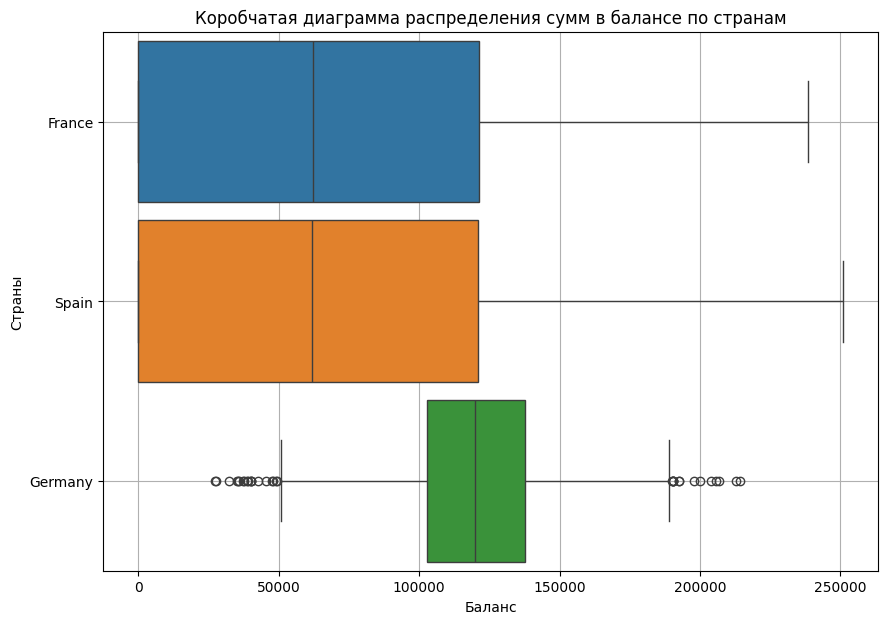

In [142]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.9,
    hue="Geography"
)
boxplot.set_title('Коробчатая диаграмма распределения сумм в балансе по странам');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Страны');
boxplot.grid()

In [ ]:
# Комментарии к заданию 9.9:
# как видно из построенной тепловой картограммы и из таблицы countries_new, доля ушедших клиентов из Германии составляет примерно 32%,
# а доля ушедших клиентов из Франции и Испании одинаково и составляет примерно по 16%.
# Вывод:
# Для того, чтобы понять по какой причине доля ушедших клиентов в Германии в 2 раза выше, чем в двух соседних странах пришлось построить еще несколько диаграмм.
# На коробчатой диаграмме распределения сумм в балансе по странам, которая построена выше, видно, что медианное значение баланса клиентов для Германии примерно в 2 раза выше,
# чем для Франции и Испании. Можно предположить, что уходят клиенты с высоким балансом и причиной тому может являться невыгодные условия, либо высокие риски.

In [143]:
# Задание 9.10 :
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
display(churn_data)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyality,Total,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,1,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,1,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,1,Good
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,1,Poor
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,1,Good
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,Good


In [145]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


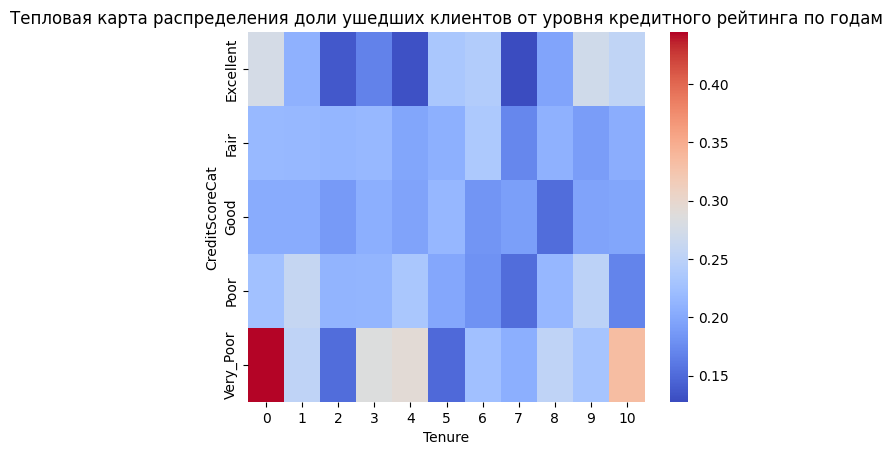

In [155]:
heatmap = sns.heatmap(data=pivot, cmap='coolwarm')
heatmap.set_title('Тепловая карта распределения доли ушедших клиентов от уровня кредитного рейтинга по годам', fontsize=12);

In [ ]:
# Комментарии к заданию 9.9:
# Из построенной тепловой карты видно, что выделяютя как минимум две категории клиентов, в которых доля ушедших клиентов максимальна.
# Больше всего уходят клиенты с максимально хорошей кредитной историей в течение одного и 10 лет использования услуг банка.